# Analiza in delo s podatki

V tej enoti boste znanje, ki ste ga osvojili v prejšnjih enotah, uporabili na praktičnem primeru. Izvedli boste prenos in predobdelavo velepodatkovne zbirke, nato pa boste nad njo izvedli analizo. V sklopu analize velepodatkov boste pridobili statistične in splošne informacije, ki bodo od vas zahtevane. Na koncu boste vse skupaj še vizualizirali z izpisi in grafi.

**Kodo je v nadaljevanju priporočljivo zaganjati v okolju [Google Colab](https://colab.research.google.com).**

## Velepodatkovna zbirka

Uporabili bomo sintetično velepodatkovno zbirko, ki vsebuje demografske informacije o Veliki Britaniji. Najprej prenesimo velepodatkovno zbirko in jo na hitro preglejmo:

In [ ]:
import pandas as pd

# Prenos velepodatkovne zbirke (~3GB; ~58mio vrstic, 5 stolpcev)
!wget "https://univerzamb-my.sharepoint.com/:x:/g/personal/mladen_borovic_um_si/ESCmmLVqkfxGpWCne3-zWQcBlbj6tKwcCDPtcDnCnUF8jg?download=1" -O uk_population.csv

--2024-04-10 14:50:51--  https://univerzamb-my.sharepoint.com/:x:/g/personal/mladen_borovic_um_si/ESCmmLVqkfxGpWCne3-zWQcBlbj6tKwcCDPtcDnCnUF8jg?download=1
Resolving univerzamb-my.sharepoint.com (univerzamb-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to univerzamb-my.sharepoint.com (univerzamb-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/mladen_borovic_um_si/Documents/Share/uk_population.csv?ga=1 [following]
--2024-04-10 14:50:52--  https://univerzamb-my.sharepoint.com/personal/mladen_borovic_um_si/Documents/Share/uk_population.csv?ga=1
Reusing existing connection to univerzamb-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 3128967829 (2.9G) [application/octet-stream]
Saving to: ‘uk_population.csv’

uk_population.csv   100%[===================>]   2.91G  80.0MB/s    in 40s     

2024-04-10 14:51:33 (73.9 MB/s) - ‘uk_population.csv’ saved [

In [ ]:
# Z ukazom %time merimo čas izvajanja celice s kodo. To nam bo potrdilo, da gre res za veliko količino podatkov.
# Po potrebi lahko naložite podatkovno zbirko na hitrejše načine, kot smo jih spoznali v prejšnjih enotah.
# Nalaganje na spodnji način bo trajalo okoli 1 minuto.

%time df = pd.read_csv('uk_population.csv')

CPU times: user 55.7 s, sys: 16.4 s, total: 1min 12s
Wall time: 1min 16s


In [ ]:
# Podrobneje poglejmo strukturo velepodatkovne zbirke.

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58479894 entries, 0 to 58479893
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   age     int64  
 1   sex     object 
 2   county  object 
 3   lat     float64
 4   long    float64
 5   name    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 11.5 GB


V zgornjem izpisu vidimo strukturo podatkov, ki vsebuje naslednje stolpce in podatkovne tipe:
* ``age`` (int64)
* ``sex`` (object)
* ``county`` (object)
* ``lat`` (float64)
* ``long`` (float64)
* ``name`` (object)

Vidimo tudi, da podatki s temi podatkovnimi tipi porabijo 11,5 GB pomnilnika. Za boljšo predstavo, izpišimo vzorec naše velepodatkovne zbirke:

In [ ]:
df.head()

,age,sex,county,lat,long,name
0,0,m,DARLINGTON,54.533644,-1.524401,FRANCIS
1,0,m,DARLINGTON,54.426256,-1.465314,EDWARD
2,0,m,DARLINGTON,54.555200,-1.496417,TEDDY
3,0,m,DARLINGTON,54.547906,-1.572341,ANGUS
4,0,m,DARLINGTON,54.477639,-1.605995,CHARLIE


Zdaj, ko imamo boljšo predstavo o obliki podatkov, lahko začnemo s predobdelavo. Vidimo, da so vsa okrožja (stolpec ``county``) in imena (stolpec ``name``) v velikih tiskanih črkah. Podatki o zemljepisni širini in dolžini (stolpca ``lat`` in ``long``) so v obliki realnih števil v natančnosti do šeste decimalke. Starost (stolpec ``age``) je celoštevilčna vrednost in predstavlja starost osebe. Spol (stolpec ``sex``) je ena izmed črk 'm' ali 'f', ki predstavljata moški ali ženski spol. Razmislite o možnih pristopih predobdelave velepodatkovne zbirke. V pomoč naj vam bodo naslednja vprašanja:

* Ali lahko kako spremenimo imena okrožij in oseb v bolj primerno obliko (npr. DARLINGTON postane Darlington, FRANCIS postane Francis)?
    * Kako bi se lotili tega?
    * Ali bi uporabili lastne funkcije, ali obstoječe funkcije?
* Ali so imena okrožij in oseb potencialni kandidat za podatkovni tip ``category``? Zakaj oz. zakaj ne?
* Ali je podatkovni tip ``int64`` za starost (``age``) optimalna izbira glede na pomnilniške zahteve?
* Ali je podatkovni tip ``float64`` za zemljepisno širino in dolžino (``lat`` in ``long``) optimalna izbira glede na pomnilniške zahteve?
* Kako bi lahko drugače shranili podatek o spolu (``sex``)?
    * Ali ima označevanje s črkami smisel?
    * Ali je tudi ta stolpec potencialni kandidat za podatkovni tip ``category`` in zakaj oz. zakaj ne?
    * Ali lahko v tem primeru uporabimo kakšen drug podatkovni tip?

In [ ]:
# V tej celici poskusite sami izvesti predobdelavo velepodatkovne zbirke

# TODO: predobdelava velepodatkovne zbirke

In [ ]:
#@title REŠITEV (pred tem poskusite sami!)
# Eden izmed možnih pristopov k predobdelavi velepodatkovne zbirke

df['age'] = pd.to_numeric(df['age'], downcast='unsigned') # pretvorba 'age' iz int64 v uint8
df['lat'] = pd.to_numeric(df['lat'], downcast='float') # pretvorba 'lat' iz float64 v float32
df['long'] = pd.to_numeric(df['long'], downcast='float') # pretvorba 'long' iz float64 v float32
df['county'] = df['county'].str.title() # pretvorba v male črke (DARLINGTON => Darlington)
df['county'] = df['county'].astype('category') # pretvorba 'county' iz object v category
df['name'] = df['name'].str.title() # pretvorba v male črke (FRANCIS => Francis)
df['name'] = df['name'].astype('category') # pretvorba 'name' iz object v category
df['sex'] = df['sex'].astype('category') # pretvorba 'sex' iz object v category

In [ ]:
# Preverite strukturo in pomnilniške zahteve predobdelane velepodatkovne zbirke

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58479894 entries, 0 to 58479893
Data columns (total 6 columns):
 #   Column  Dtype   
---  ------  -----   
 0   age     uint8   
 1   sex     category
 2   county  category
 3   lat     float32 
 4   long    float32 
 5   name    category
dtypes: category(3), float32(2), uint8(1)
memory usage: 782.1 MB


Odgovorite na naslednja vprašanja:
* Ali so se podatki po predobdelavi spremenili?
* Ali je predobdelava zmanjšala pomnilniške zahteve velepodatkov? Če je, za koliko?
* Ali je predobdelava velepodatkovnih podatkovnih zbirk v splošnem smiselna?

## Analiza in delo s podatki

Po predobdelavi in pripravi velepodatkovne zbirke lahko začnemo z analizo. V nadaljevanju boste nad velepodatkovno zbirko izvedli poizvedbe, ki bodo del analize. Pomagajte si z dokumentacijo Pandas:
* [Indeksiranje in izbiranje](https://pandas.pydata.org/docs/user_guide/indexing.html)
* [.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
* [Agregatne funkcije](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html)
* [.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
* [.value_counts() (Series)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html), [.value_counts() (DataFrame)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)
* [.sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)
* [.min()](https://pandas.pydata.org/docs/reference/api/pandas.Series.min.html)
* [.max()](https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html)
* [.unique()](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)
* [.tolist()](https://pandas.pydata.org/docs/reference/api/pandas.api.extensions.ExtensionArray.tolist.html)
* [.to_dict()](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_dict.html)


**Poizvedba #1:** Zanima nas katera okrožja s prebivalci v Veliki Britaniji se nahajajo severno od okrožja York.

In [ ]:
# V tej celici poskusite sami rešiti poizvedbo #1:

# TODO: poizvedba #1

In [ ]:
#@title REŠITEV #1 (pred tem poskusite sami)

# Korak 1: pridobimo vse osebe, ki živijo v okrožju York
yorkers = df.loc[df['county'] == 'York']

# Korak 2: pridobimo največjo zemljepisno širino (lat) oseb, ki živijo v okrožju York; to bo najbolj severna oseba
northernmost = yorkers['lat'].max() # uporaba agregatne funkcije .max()

# Korak 3: filtriramo vsa okrožja na podlagi največje zemljepisne širine za York
result = df.loc[df['lat'] > northernmost]['county'].unique().tolist()

# df.loc[df['lat' > northernmost]] vrne vse vrstice, kjer je 'lat' večji od 'northernmost'
# s ['county'] izberemo stolpec okrožij, saj nas zanimajo okrožja
# z .unique() odstranimo podvojene vrednosti
# s .tolist() pretvorimo rezultat v seznam

result # izpišemo rezultat, ki je seznam okrožij in so severno od Yorka

['Darlington',
 'County Durham',
 'Hartlepool',
 'Middlesbrough',
 'Northumberland',
 'Redcar And Cleveland',
 'Stockton-On-Tees',
 'Gateshead',
 'Newcastle Upon Tyne',
 'North Tyneside',
 'South Tyneside',
 'Sunderland',
 'Cumbria',
 'Lancashire',
 'East Riding Of Yorkshire',
 'North Yorkshire',
 'Lincolnshire']

**Poizvedba #2:** Zanima nas v katerih okrožjih v Veliki Britaniji živijo ljudje z imenom Robert. Kot rezultat si želimo slovar, ki je padajoče urejen po številu oseb z imenom Robert v vsakem okrožju. Ključ v slovaru naj bo okrožje, vrednost pa pripadajoče število oseb z imenom Robert.

In [ ]:
# V tej celici poskusite sami rešiti poizvedbo #2:

# TODO: poizvedba #2

In [ ]:
#@title REŠITEV #2 (pred tem poskusite sami)

# Korak 1: pridobimo vse osebe, ki jim je ime 'Robert'
all_roberts = df.loc[df['name'] == 'Robert']

# Korak 2: grupiramo vse Roberte po okrožjih in jih preštejemo
roberts_by_county = all_roberts.groupby('county').size()

# z groupby('county') grupiramo vse Roberte po okrožjih
# s .size() preštejemo število Robertov v vsakem okrožju

# Korak 3: uredimo seznam okrožij padajoče po številu Robertov
sorted_counties = roberts_by_county.sort_values(ascending=False)

# s .sort_values(ascending=False) uredimo seznam v padajočem vrstnem redu

# Korak 4: rezultat pretvorimo v slovar, kjer so ključi okrožja, vrednosti pa število Robertov
result = sorted_counties.to_dict()

result # izpišemo rezultat, ki je slovar okrožij s številom Robertov

{'Kent': 1392,
 'Essex': 1315,
 'Hampshire': 1223,
 'Hertfordshire': 1090,
 'Lancashire': 1085,
 'Surrey': 1077,
 'Birmingham': 1053,
 'Norfolk': 867,
 'West Sussex': 791,
 'Staffordshire': 768,
 'Nottinghamshire': 735,
 'Devon': 689,
 'Suffolk': 686,
 'Leeds': 683,
 'Derbyshire': 682,
 'Lincolnshire': 666,
 'Northamptonshire': 661,
 'Oxfordshire': 619,
 'Leicestershire': 617,
 'Cambridgeshire': 580,
 'North Yorkshire': 558,
 'Gloucestershire': 536,
 'Warwickshire': 535,
 'Sheffield': 533,
 'Worcestershire': 526,
 'East Sussex': 500,
 'Somerset': 488,
 'Manchester': 484,
 'Buckinghamshire': 479,
 'Cornwall': 478,
 'Bradford': 469,
 'Cumbria': 465,
 'Liverpool': 449,
 'Bristol, City Of': 444,
 'Wiltshire': 433,
 'Kirklees': 431,
 'County Durham': 431,
 'Cardiff': 394,
 'Ealing': 351,
 'Cheshire East': 349,
 'Newham': 349,
 'Croydon': 338,
 'Barnet': 337,
 'Dorset': 327,
 'Nottingham': 321,
 'Cheshire West And Chester': 320,
 'Redbridge': 318,
 'Coventry': 316,
 'Hillingdon': 309,
 'Wake

**Poizvedba #3:** Zanima nas najpogostejše moško ime v Veliki Britaniji.

In [ ]:
# V tej celici poskusite sami rešiti poizvedbo #3

# TODO: poizvedba #3

In [ ]:
#@title REŠITEV #3 (pred tem poskusite sami)

# Korak 1: pridobimo vse prebivalce, ki so moški
male_names = df[df['sex'] == 'm']

# Korak 2: grupiramo vsa moška imena in jih preštejemo
grouped_male_names = male_names.groupby('name').size()

# Korak 3: uredimo seznam moških imen padajoče po številu pojavitev
sorted_male_names = grouped_male_names.sort_values(ascending=False)

# Korak 4: izberemo prvo moško ime in število pojavitev v obliki slovarja
result = sorted_male_names.head(1).to_dict()

result # izpišemo rezultat, ki je slovar z najpogostejšim moškim imenom in številom pojavitev

{'Oliver': 576135}

**Poizvedba #4:** Zanimajo nas vsa ženska imena v Manchestru, ki se začnejo s črko 'S' in končajo s črko 'a'.

In [ ]:
# V tej celici poskusite sami rešiti poizvedbo #4

# TODO: poizvedba #4

In [ ]:
#@title REŠITEV #4 (pred tem poskusite sami)

# Korak 1: pridobimo vse prebivalke v Manchestru
mnchstr_female_names = df[(df['sex'] == 'f') & (df['county'] == 'Manchester')]

# uporabili smo logični operator & za združevanje dveh pogojev

# Korak 2: pridobimo vsa ženska imena, ki se začnejo na črko 'S' in končajo s črko 'a'
female_names_SA = mnchstr_female_names[mnchstr_female_names['name'].str.startswith('S') & mnchstr_female_names['name'].str.endswith('a')]

# uporabili smo metodi .str.startswith() in .str.endswith() za filtriranje imen, lahko pa bi uporabili tudi regularne izraze

# Korak 3: odstranimo podvajanja in shranimo v seznam
result = female_names_SA['name'].unique().tolist()

result # izpišemo rezultat, ki je seznam ženskih imen v Manchestru, ki se začnejo na 'S' in končajo z 'a'

['Sofia',
 'Safa',
 'Sophia',
 'Szofia',
 'Sylvia',
 'Sienna',
 'Safeeya',
 'Syeda',
 'Sasha',
 'Siya',
 'Safia',
 'Safaa',
 'Sara',
 'Stella',
 'Sakeena',
 'Samantha',
 'Sidra',
 'Siena',
 'Shoshanna',
 'Shianna',
 'Serra',
 'Safiya',
 'Sabiha',
 'Shanaaya',
 'Samaira',
 'Saira',
 'Selena',
 'Sumaya',
 'Stefania',
 'Sedra',
 'Shifa',
 'Sefora',
 'Soraya',
 'Serena',
 'Saliha',
 'Shriya',
 'Sarina',
 'Shanaya',
 'Sirena',
 'Samiya',
 'Skyla',
 'Savana',
 'Susanna',
 'Sabina',
 'Samuela',
 'Sanaya',
 'Saskia',
 'Samara',
 'Salma',
 'Siyana',
 'Shara',
 'Safina',
 'Sanjana',
 'Shaniya',
 'Sheila',
 'Sunaina',
 'Silva',
 'Sapphira',
 'Sabrina',
 'Sakura',
 'Salwa',
 'Sumaira',
 'Saina',
 'Suraiya',
 'Suraya',
 'Saara',
 'Sama',
 'Swara',
 'Sameeha',
 'Shaila',
 'Shazia',
 'Sia',
 'Seana',
 'Sukayna',
 'Samia',
 'Sana',
 'Simona',
 'Samanta',
 'Samira',
 'Sonya',
 'Sofija',
 'Sahra',
 'Seraphina',
 'Sitara',
 'Sumaiya',
 'Sora',
 'Serafina',
 'Savanna',
 'Sandra',
 'Sanela',
 'Seraya',
 'S

## Vizualizacija

Med analizo podatkov nam je velikokrat v pomoč tudi grafično predstaviti delne rezultate analize in zaključke. Knjižnica Pandas omogoča hitro vizualizacijo podatkov z znano knjižnico [Matplotlib](https://matplotlib.org/). Preglejte dokumentacijo o možnostih vizualizacije v knjižnici Pandas:

* [Preprosto risanje grafov](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#plotting)
* [Vizualizacija z grafi](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
* [Napredna vizualizacija z grafi](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook-plotting)
* [Vizualizacija s tabelami](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

Vizualizacija v Pandas se največkrat uporabi za hiter izris grafov nad podatki, ki jih imamo v strukturah Pandas DataFrame ali Series. Vgrajena funkcija [.plot()](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#basic-plotting-plot) je pravzaprav ovojnica [istoimenske funkcije knjižnice Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html).

V nadaljevanju bomo nad velepodatkovno zbirko izvedli nekaj poizvedb, rezultate pa bomo grafično predstavili z grafi.

**Poizvedba #5:** Zanima nas 10 največjih okrožij v Veliki Britaniji po številu prebivalcev. Rezultat želimo imeti v obliki stolpčnega grafikona, okrožja pa naj bodo urejena v padajočem vrstnem redu po številu prebivalcev.

In [ ]:
# V tej celici poskusite sami rešiti poizvedbo #5

# TODO: poizvedba #5

county
Kent             1568623
Essex            1477764
Hampshire        1376316
Lancashire       1210053
Surrey           1189934
Hertfordshire    1184365
Birmingham       1141374
Norfolk           903680
Staffordshire     875219
West Sussex       858852
dtype: int64

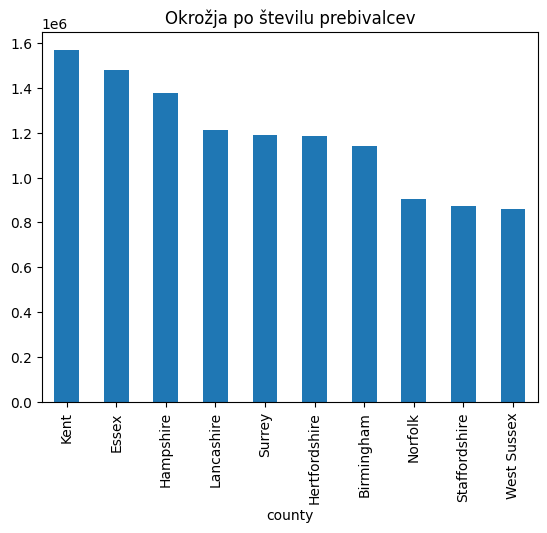

In [ ]:
#@title REŠITEV #5 (pred tem poskusite sami)

# Korak 1: pridobimo imena vseh okrožij, ki jih grupiramo po imenu in preštejemo skupno število prebivalcev na okrožje
data = df.groupby('county').size()

# Korak 2: uredimo seznam okrožij padajoče po številu prebivalcev
data = data.sort_values(ascending=False)

# Korak 3: vzamemo prvih 10 okrožij (največje število prebivalcev)
data = data.head(10)

# Korak 4: rezultat izrišemo v obliki stolpčnega grafikona
data.plot(kind='bar', title='Okrožja po številu prebivalcev')

# S funkcijo .plot() izrišemo stolpčni grafikon
# Z atributom kind='bar' določimo vrsto grafa (stolpčni grafikon)
# Z atributom title določimo naslov grafikona

# 10 največjih okrožij shranimo v urejen seznam (list)
top10_counties = data.head(10).reset_index()['county'].tolist()

# Izpišimo še tabelo s podatki
data.head(10)

Rezultat je stolpčni grafikon, ki pa ni najbolje oblikovan. Os Y uporablja slabo berljivo obliko zapisa velikih števil. Poskusimo to popraviti z nekaj funkcionalnostmi knjižnice Matplotlib:

<Axes: title={'center': 'Okrožja po številu prebivalcev'}, xlabel='county'>

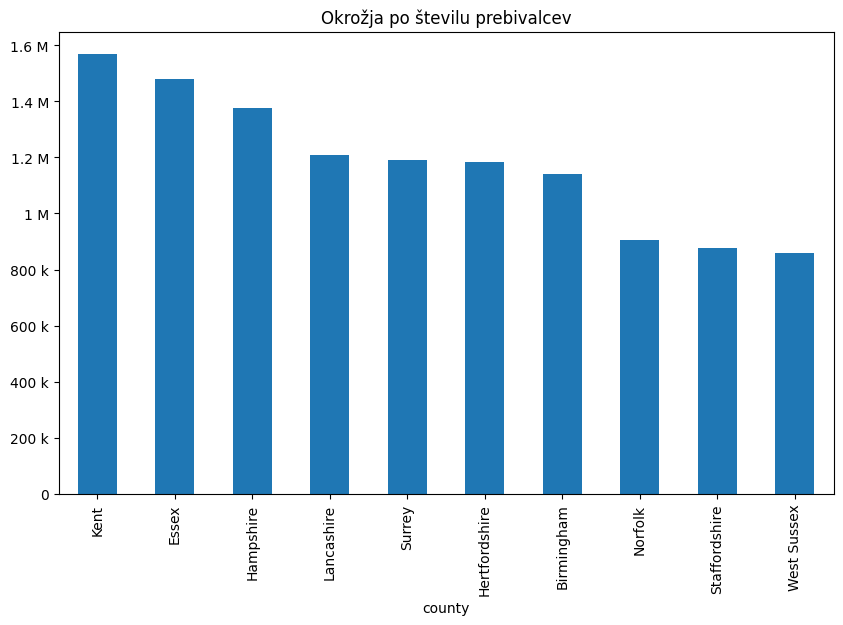

In [ ]:
# Ponovimo vse od prej

data = df.groupby('county').size().sort_values(ascending=False).head(10)

# Delne rezultate posameznih korakov lahko verižimo (ang. chaining); to je pogosta praksa pri delu s podatkovnimi zbirkami

# Vključimo knjižnico Matplotlib in izboljšajmo izgled rezultata

import matplotlib.pyplot as plt # funkcije za risanje grafov
import matplotlib.ticker as ticker # funkcije za osi grafov

fig, ax = plt.subplots(1, figsize=[10,6]) # ustvarimo sliko in osi
ax.yaxis.set_major_formatter(ticker.EngFormatter()) # formatiramo oznake na y-osi v inženirski zapis

data.plot(kind='bar', title='Okrožja po številu prebivalcev', ax=ax) # izrišemo stolpčni grafikon z nastavitvami osi Y

Rezultat je bolj berljiv stolpični graf, ki prikazuje 10 največjih okrožij v Veliki Britaniji po številu prebivalcev.

**Poizvedba #6:** Zanima nas razmerje med moškimi in ženskimi prebivalci. Želimo si rezultat v obliki tortnega diagrama.

In [ ]:
# V tej celici poskusite sami rešiti poizvedbo #6

# TODO: poizvedba #6

<Axes: title={'center': 'Razmerje med moškimi in ženskami'}>

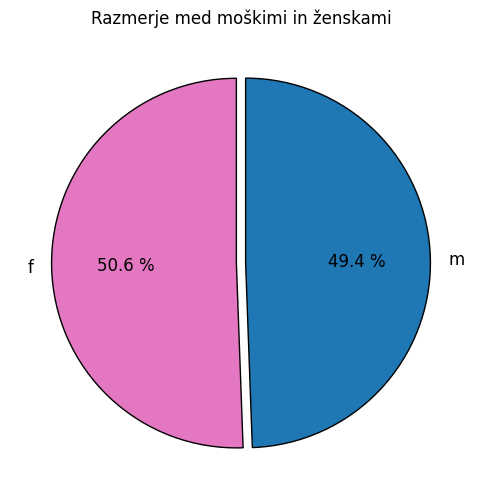

In [ ]:
#@title REŠITEV #6 (pred tem poskusite sami)

# Korak 1: pridobimo vse prebivalce in jih grupiramo po spolu
data = df.groupby('sex').size()

# Korak 2: izrišemo tortni diagram
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=[10, 6])
data.plot(kind='pie', title='Razmerje med moškimi in ženskami', colors=['tab:pink', 'tab:blue'], startangle=90, autopct='%1.1f %%', explode=(0.025, 0.025), wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, fontsize=12, ax=ax)

**Poizvedba #7:** Zanimajo nas razmerja med moškimi in ženskimi prebivalci za vsako izmed desetih največjih okrožij po prebivalcih. Rezultat naj bo v obliki več tortnih diagramov, ki so ustrezno označeni z imeni okrožij.

In [ ]:
# V tej celici poskusite rešiti poizvedbo #7

# TODO: poizvedba #7

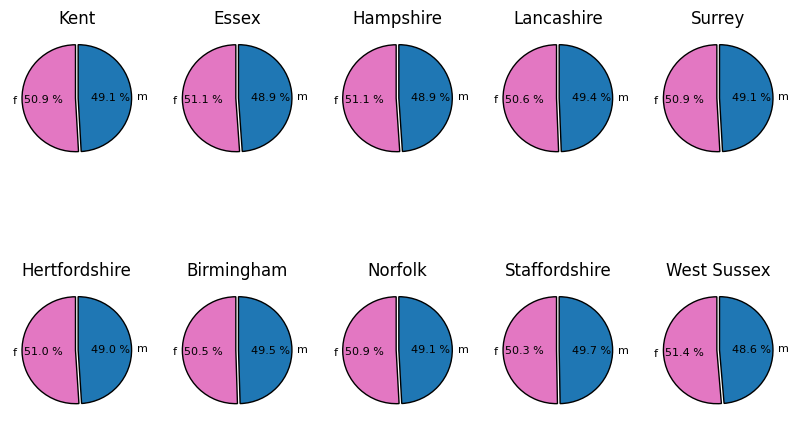

In [ ]:
#@title REŠITEV #7 (pred tem poskusite sami)

# Korak 1: pridobimo vse prebivalce desetih največjih okrožij (to lahko naredimo s poizvedbo #5), ali pa uporabimo seznam, ki smo ga shranili pri poizvedbi #5.

# Korak 2: pripravimo potek izrisa diagramov
import matplotlib.pyplot as plt

# tortne diagrame bomo izrisali v dveh vrsticah in petih stolpcih (risali bomo 10 diagramov)
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=[10, 6])

# Korak 3: izrišimo tortne diagrame

for idx, county in enumerate(top10_counties):
    # za vsako okrožje pridobimo podatke o razmerju med moškimi in ženskami
    data_county = df[df['county'] == county].groupby('sex').size()

    # naslov tortnega diagrama
    title = f'{county} (#{idx + 1})'

    # podatke o okrožju izrišemo s tortnim diagramom
    data_county.plot(kind='pie',    # tortni diagram
                     title=county,  # naslov diagrama
                     colors=['tab:pink', 'tab:blue'],
                     startangle=90, # začetni kot
                     autopct='%1.1f %%', # oblika odstotkov
                     fontsize=8, # velikost pisave
                     explode=(0.025, 0.025), # prostor med rezinami
                     wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, # oblika rezin
                     ax=ax[idx // 5, idx % 5]) # izris v ustrezno celico



**Poizvedba #8:** Podatke o prebivalstvu želimo prikazati v obliki prebivalstvene piramide. Starostne skupine naj obsegajo obdobje 5 let (npr. 0-4, 5-9, 10-14, itd.), na levi strani naj bodo z modro barvo prikazani podatki za moške, na desni strani pa z roza barvo podatki za ženske.

In [ ]:
# V tej celici poskusite sami rešiti poizvedbo #8

# TODO: poizvedba #8

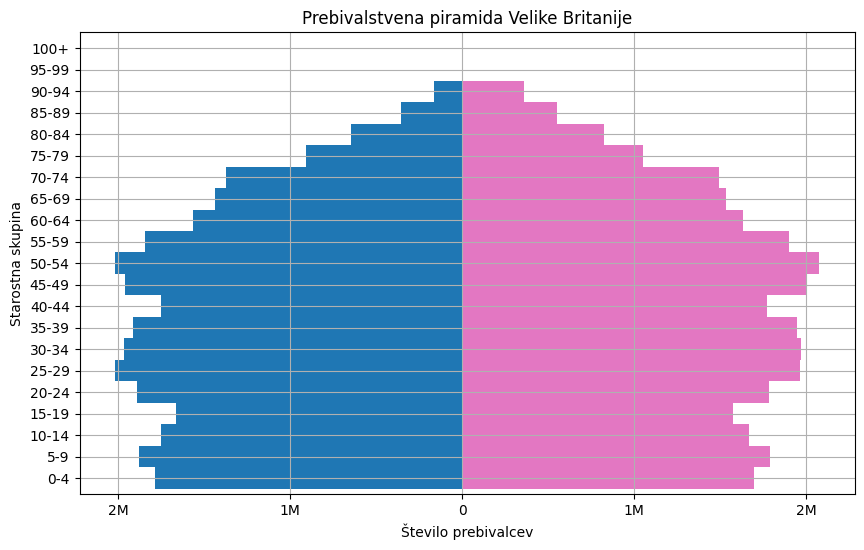

In [ ]:
#@title REŠITEV #8 (pred tem poskusite sami)

# Korak 1: definirajmo starostne skupine
age_group_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                    '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                    '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']

age_groups = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
              85, 90, 95, 100, 150]

# uporabimo funkcijo .cut() za dodelitev starostnih skupin; pri tem bomo dodali stolpec 'age_group'
df['age_group'] = pd.cut(df['age'], bins=age_groups, labels=age_group_labels, right=False)

# Korak 2: pridobimo vse prebivalce in jih grupiramo po spolu in starostni skupini
age_group_by_sex_counts = df.groupby(['sex', 'age_group']).size()

# Korak 3: podatki za moške morajo biti v prebivalstveni piramidi na levi strani, zato vrednosti pomnožimo z -1
age_group_by_sex_counts['m'] *= -1

# Korak 4: izrišemo prebivalstveno piramido
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=[10, 6])

# najprej izrišemo moške
age_group_by_sex_counts['m'].plot(kind='barh', color='tab:blue', width=1.0, ax=ax)

# nato izrišemo ženske
age_group_by_sex_counts['f'].plot(kind='barh', color='tab:pink', width=1.0, ax=ax)

# dodamo oznake in mrežo
ax.set_title('Prebivalstvena piramida Velike Britanije')
ax.set_xlabel('Število prebivalcev')
ax.set_ylabel('Starostna skupina')
ax.grid() # dodamo mrežo

# prilagodimo oznake na x-osi
plt.xticks(ticks=[-2_000_000, -1_000_000, 0, 1_000_000, 2_000_000],
    labels=['2M', '1M', '0', '1M', '2M'])

# prikažemo prebivalstveno piramido
fig.show()

**Poizvedba #9:** Prikazati želimo prebivalstvene piramide za deset največjih okrožij.

In [ ]:
# V tej celici poskusite sami rešiti poizvedbo #9

# TODO: poizvedba #9

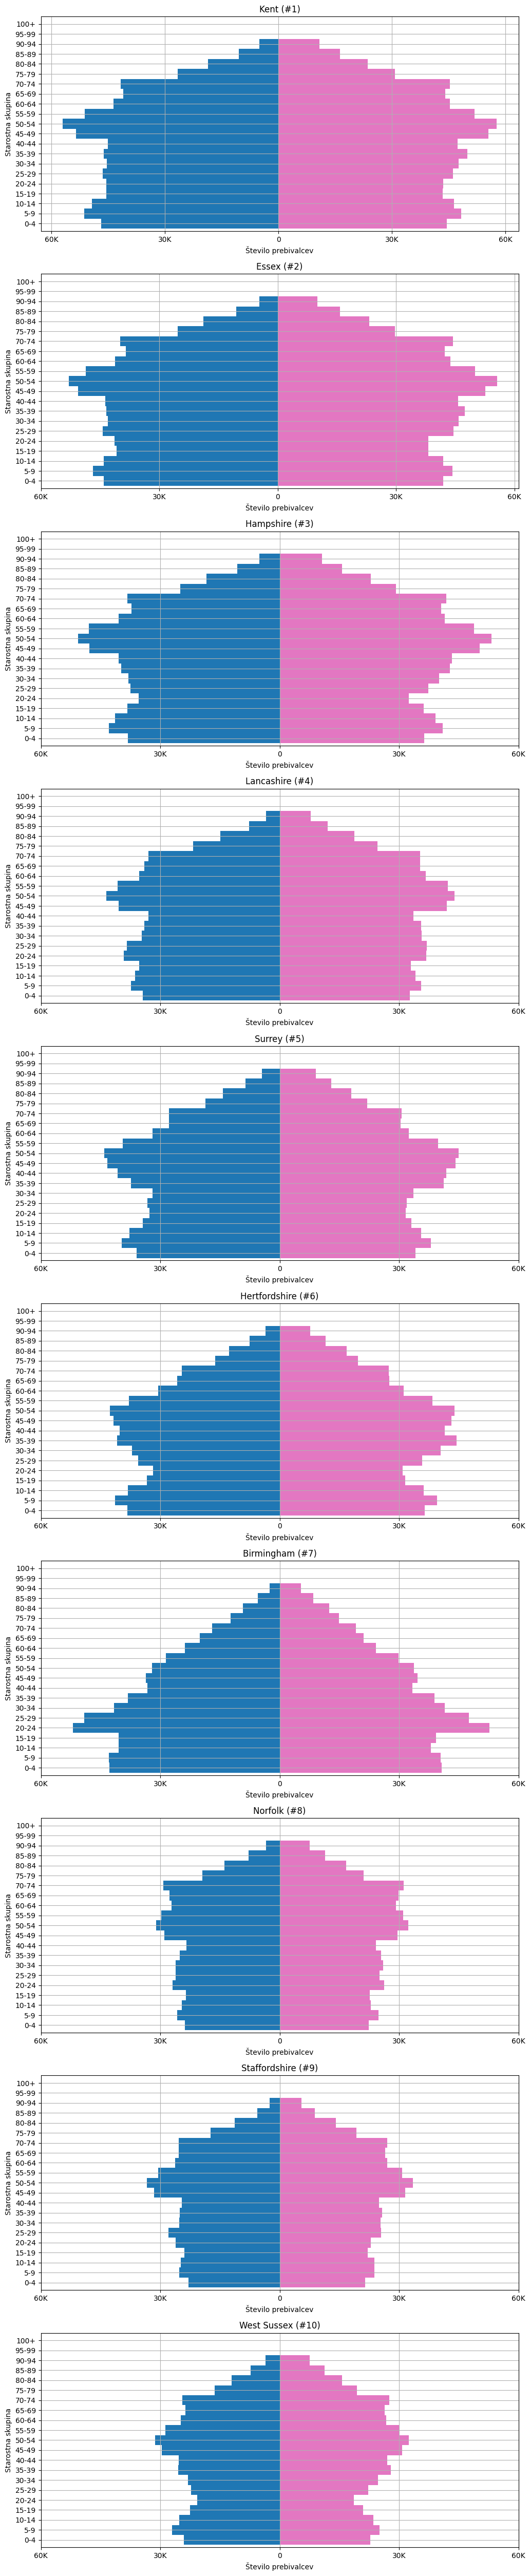

In [ ]:
#@title REŠITEV #9 (pred tem poskusite sami)

# Korak 1: pridobimo grupirane podatke o prebivalcih po okrožjih in starostnih skupinah (uporabimo korake 1-3 iz poizvedbe #8)
# Ker smo to že storili, bomo uporabili spremenljivko "age_group_by_sex_counts"

# Korak 2: pridobimo največjih 10 okrožij (uporabimo poizvedbo #5)
# Ker smo to že storili, bomo uporabili spremenljivko "top10_counties"

# Korak 3: izrišimo prebivalstvene piramide za vsako od 10 največjih okrožij

# pripravimo potek izrisa prebivalstvenih piramid (10 prebivalstvenih piramid, vsaka v svoji vrstici)
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=[12, 64])

for idx, county in enumerate(top10_counties):
    # za vsako okrožje pridobimo podatke za prebivalstveno piramido
    data_county = df[df['county'] == county].groupby(['sex', 'age_group']).size()
    title = f'{county} (#{idx + 1})'

    # izrišemo podatke za moške
    data_county['m'] *= -1
    data_county['m'].plot(kind='barh', color='tab:blue', width=1.0, ax=ax[idx % 10]) # izris v ustrezno celico

    # izrišemo podatke za ženske
    data_county['f'].plot(kind='barh', color='tab:pink', width=1.0, ax=ax[idx % 10]) # izris v ustrezno celico

    # dodamo oznake in mrežo
    ax[idx % 10].set_title(title)
    ax[idx % 10].set_xlabel('Število prebivalcev')
    ax[idx % 10].set_ylabel('Starostna skupina')
    ax[idx % 10].grid() # dodamo mrežo

    # prilagodimo oznake na x-osi
    plt.sca(ax[idx % 10]) # izberemo pravilno os
    plt.xticks(ticks=[-60_000, -30_000, 0, 30_000, 60_000], labels=['60K', '30K', '0', '30K', '60K'])

# prikažemo prebivalstvene piramide
fig.show()